In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [49]:
df_producao = pd.read_csv('data/producao_soja_campo_novo_parecis.csv', delimiter = ';')
df_producao

,cidade,area_plantada,area_colhida,qtd_produzida,data
0,Campo Novo do Parecis,291070,291070,818489,2000
1,Campo Novo do Parecis,283000,283000,849000,2001
2,Campo Novo do Parecis,300000,300000,900000,2002
3,Campo Novo do Parecis,320186,320186,902924,2003
4,Campo Novo do Parecis,325882,325882,879881,2004
5,Campo Novo do Parecis,343301,343301,1071099,2005
6,Campo Novo do Parecis,350000,344750,868770,2006
7,Campo Novo do Parecis,298000,298000,894000,2007
8,Campo Novo do Parecis,311500,311500,990570,2008
9,Campo Novo do Parecis,311500,311500,967208,2009


In [50]:
df_clima = pd.read_csv('data/clima_campo_novo_parecis_noheader.csv', delimiter = ';')

In [51]:
data = df_clima['data']
ano = [a.split('/')[-1] for a in data]
df_clima['data'] = ano

In [53]:
df_clima['data']=df_clima['data'].astype(int)
df_producao['data']=df_producao['data'].astype(int)

df_outer = pd.merge(df_clima, df_producao, on = 'data')
df_outer

,data,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C),"TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)",cidade,area_plantada,area_colhida,qtd_produzida
0,2002,NaN,NaN,"23,7","28,3","26,2","25,1",86,71.0,NaN,NaN,Campo Novo do Parecis,300000,300000,900000
1,2002,NaN,NaN,"21,275","26,3","24,108333",NaN,"84,416667",71.0,NaN,NaN,Campo Novo do Parecis,300000,300000,900000
2,2002,NaN,NaN,"21,583333","29,4","24,575","21,3","84,041667",62.0,NaN,NaN,Campo Novo do Parecis,300000,300000,900000
3,2002,NaN,NaN,"20,979167","29,5","23,379167","21,4","87,166667",60.0,NaN,NaN,Campo Novo do Parecis,300000,300000,900000
4,2002,NaN,NaN,"20,683333","28,7","23,433333","20,4","85,458333",62.0,NaN,NaN,Campo Novo do Parecis,300000,300000,900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6224,2019,NaN,"950,816667",NaN,"32,6","25,8","22,5",NaN,NaN,8,"1,05",Campo Novo do Parecis,380000,380000,1276800
6225,2019,NaN,"950,745833",NaN,"30,7","24,216667",21,NaN,NaN,"8,3","1,304167",Campo Novo do Parecis,380000,380000,1276800
6226,2019,NaN,"950,229167",NaN,31,"24,816667","21,7",NaN,NaN,"6,9","0,795833",Campo Novo do Parecis,380000,380000,1276800
6227,2019,NaN,"949,245833",NaN,"31,3","24,758333","21,6",NaN,NaN,"12,2","1,033333",Campo Novo do Parecis,380000,380000,1276800


In [54]:
df_outer = df_outer.drop(columns=['cidade'], axis = 0)
df_outer.columns = [
    'data',
    'prec_total_diario',
    'pressao_atm_med_dia',
    'temp_ponto_orvalho_med',
    'temp_max_dia',
    'temp_med_dia',
    'temp_min_dia',
    'umi_rel_ar_med',
    'umi_rel_ar_min',
    'vento_raj_max_dia',
    'vento_vel_med_dia',
    'area_plantada',
    'area_colhida',
    'qtd_produzida'
]

In [55]:
df_outer.isna().sum()

data                         0
prec_total_diario         1693
pressao_atm_med_dia       1450
temp_ponto_orvalho_med    1614
temp_max_dia              1131
temp_med_dia              1503
temp_min_dia              1136
umi_rel_ar_med            1459
umi_rel_ar_min            1394
vento_raj_max_dia         1167
vento_vel_med_dia         1450
area_plantada                0
area_colhida                 0
qtd_produzida                0
dtype: int64

In [9]:
df_outer.dtypes

data                        int32
prec_total_diario          object
pressao_atm_med_dia        object
temp_ponto_orvalho_med     object
temp_max_dia               object
temp_med_dia               object
temp_min_dia               object
umi_rel_ar_med             object
umi_rel_ar_min            float64
vento_raj_max_dia          object
vento_vel_med_dia          object
area_plantada               int64
area_colhida                int64
qtd_produzida               int64
dtype: object

In [58]:
df = df_outer.dropna()
df = df.astype(str).stack().str.replace(',','.').unstack().astype(float)
df.head()

,data,prec_total_diario,pressao_atm_med_dia,temp_ponto_orvalho_med,temp_max_dia,temp_med_dia,temp_min_dia,umi_rel_ar_med,umi_rel_ar_min,vento_raj_max_dia,vento_vel_med_dia,area_plantada,area_colhida,qtd_produzida
36,2003.0,0.0,950.507143,21.254167,30.3,24.883333,22.0,81.458333,54.0,7.2,1.935714,320186.0,320186.0,902924.0
37,2003.0,26.6,951.679167,20.950000,25.0,22.454167,21.9,91.250000,82.0,10.6,2.062500,320186.0,320186.0,902924.0
38,2003.0,49.2,951.700000,20.483333,25.6,22.445833,21.2,88.833333,73.0,9.5,2.379167,320186.0,320186.0,902924.0
39,2003.0,5.6,951.050000,20.483333,28.6,23.491667,21.2,83.833333,63.0,9.5,2.675000,320186.0,320186.0,902924.0
40,2003.0,0.4,949.629167,19.716667,28.5,23.829167,21.1,79.041667,57.0,9.7,2.487500,320186.0,320186.0,902924.0


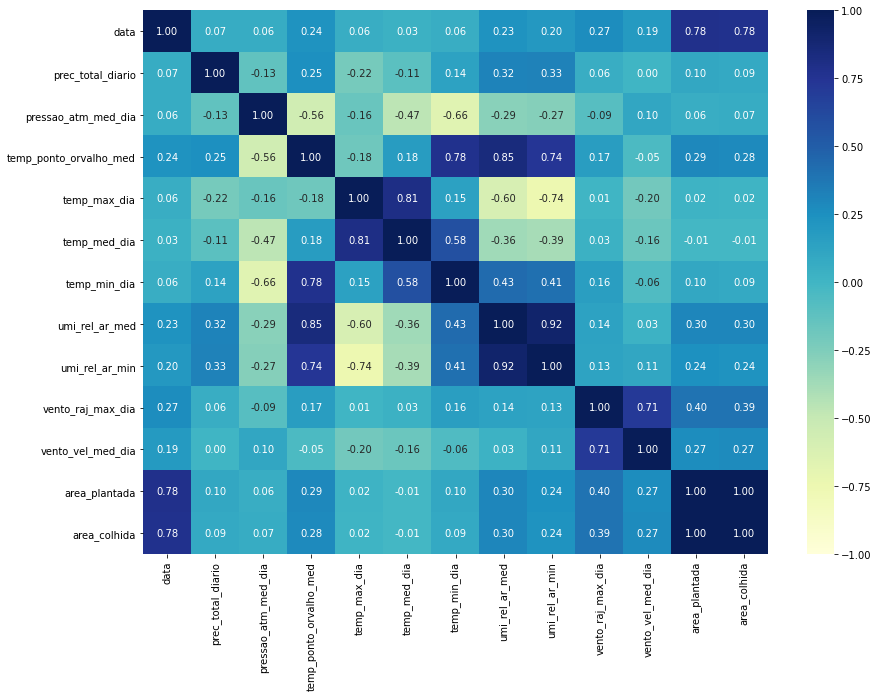

In [59]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.drop('qtd_produzida', axis=1).corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=-1);

In [64]:
X = df.iloc[:, 0:13].values
y = df.iloc[:, 13].values

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [66]:
model_v1 = linear_model.LinearRegression()

In [67]:
model_v1.fit(X_train, y_train)

LinearRegression()

In [68]:
predict_v1 = model_v1.predict(X_test)

In [69]:
mean_squared_error(y_test, predict_v1)

1405161355.8990204

In [75]:
mean_absolute_error(y_test, predict_v1)

29052.279004791108

In [70]:
r2_score(y_test, predict_v1)

0.9281610151242784

In [71]:
cv_4_results = cross_val_score(model_v1, X, y, cv=4, scoring="neg_mean_squared_error")

In [72]:
cv_4_results

array([-5.97098861e+09, -8.26156180e+08, -8.39769447e+08, -9.60179711e+09])